In [84]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

from package import encoder

In [140]:
csv = pd.read_csv("Halpha.csv", encoding='latin-1', index_col=['ID', 'RA', 'DEC'])
#csv = encoder.encode_DataFrame(train)
df = pd.DataFrame()

In [141]:
csv.columns

Index(['Field', 'FWHM', 'ISOarea', 'KRON_RADIUS', 'MU_MAX', 'nDet_PStotal',
       'PhotoFlagDet', 'CLASS_STAR', 'u_PStotal', 'J0378_PStotal',
       'J0395_PStotal', 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal',
       'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 'i_PStotal',
       'J0861_PStotal', 'z_PStotal', 'e_u_PStotal', 'e_J0378_PStotal',
       'e_J0395_PStotal', 'e_J0410_PStotal', 'e_J0430_PStotal', 'e_g_PStotal',
       'e_J0515_PStotal', 'e_r_PStotal', 'e_J0660_PStotal', 'e_i_PStotal',
       'e_J0861_PStotal', 'e_z_PStotal'],
      dtype='object')

In [144]:
csv.shape

(2187, 32)

# Novo Data Frame

In [148]:
ndf = csv.loc[(csv['e_u_PStotal']<0.2) & 
                (csv['e_J0378_PStotal']<0.2) & 
                (csv['e_J0395_PStotal']<0.2) & 
                (csv['e_J0410_PStotal']<0.2) & 
                (csv['e_J0430_PStotal']<0.2) & 
                (csv['e_g_PStotal']<0.2) & 
                (csv['e_J0515_PStotal']<0.2) & 
                (csv['e_r_PStotal']<0.2) & 
                (csv['e_J0660_PStotal']<0.2) & 
                (csv['e_i_PStotal']<0.2) & 
                (csv['e_J0861_PStotal']<0.2) & 
                (csv['e_z_PStotal']<0.2),
                ['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 
                 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

# DataFrame reduzido

In [201]:
rdf = csv.loc[(csv['e_J0410_PStotal']<0.2) & 
                (csv['e_J0430_PStotal']<0.2) & 
                (csv['e_g_PStotal']<0.2) & 
                (csv['e_J0515_PStotal']<0.2) & 
                (csv['e_r_PStotal']<0.2) & 
                (csv['e_J0660_PStotal']<0.2) & 
                (csv['e_i_PStotal']<0.2) & 
                (csv['e_J0861_PStotal']<0.2) & 
                (csv['e_z_PStotal']<0.2),
                ['J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

# DataFrame mais reduzido ainda

In [215]:
df = csv.loc[(csv['e_J0430_PStotal']<0.2) & 
                (csv['e_g_PStotal']<0.2) & 
                (csv['e_J0515_PStotal']<0.2) & 
                (csv['e_r_PStotal']<0.2) & 
                (csv['e_J0660_PStotal']<0.2) & 
                (csv['e_i_PStotal']<0.2),
                ['J0430_PStotal', 'g_PStotal', 'J0515_PStotal', 
                 'r_PStotal', 'J0660_PStotal', 'i_PStotal']]

# Teste1 PCA

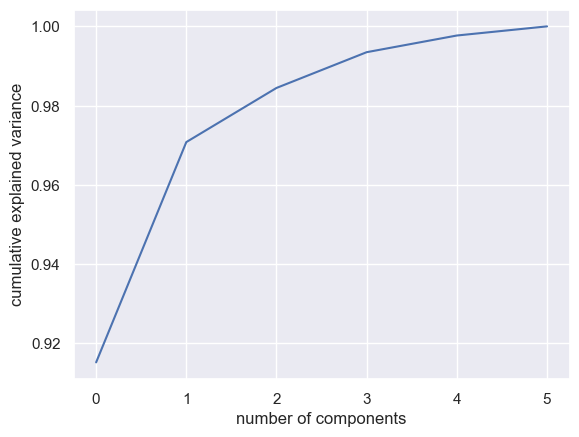

In [216]:
# Identificando quantos componentes serão necenssários
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Verificando, 2 componentes é o necessário para essa base!

In [233]:
pca = PCA(4)

In [234]:
df_pca = pca.fit_transform(df)

In [235]:
print(f"Data Frame Shape: {df.shape}")
print(f"PCA Frame Shape: {df_pca.shape}")

Data Frame Shape: (1063, 6)
PCA Frame Shape: (1063, 4)


In [236]:
df_pca

array([[ 9.39925172,  0.93180231, -0.17780947,  0.21211283],
       [ 8.92703714, -0.92675205,  0.07820022,  0.02115975],
       [ 8.5865645 , -0.89963901, -0.12978651,  0.24230089],
       ...,
       [-3.3652962 , -0.07474273,  0.18842763,  0.05827339],
       [-4.04258884,  0.55297886, -0.07088813,  0.38424303],
       [-2.14465758, -0.11891751,  2.14340774, -0.08725665]])

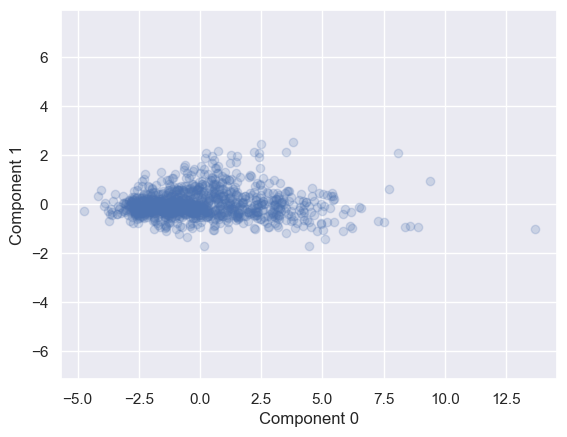

In [237]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

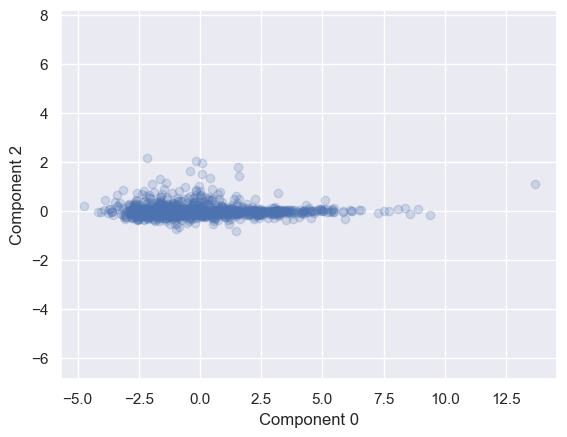

In [238]:
plt.scatter(df_pca[:, 0], df_pca[:, 2], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 2');
plt.axis('equal');

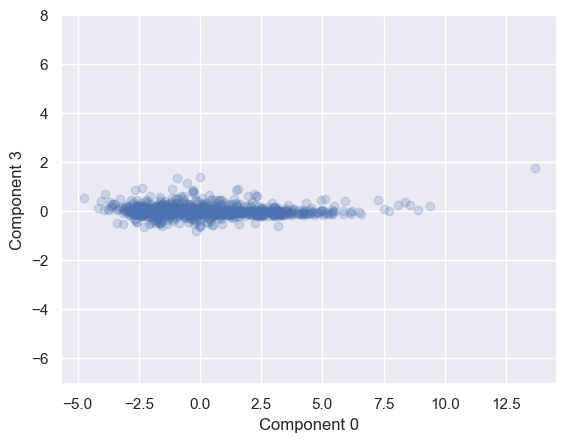

In [239]:
plt.scatter(df_pca[:, 0], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 3');
plt.axis('equal');

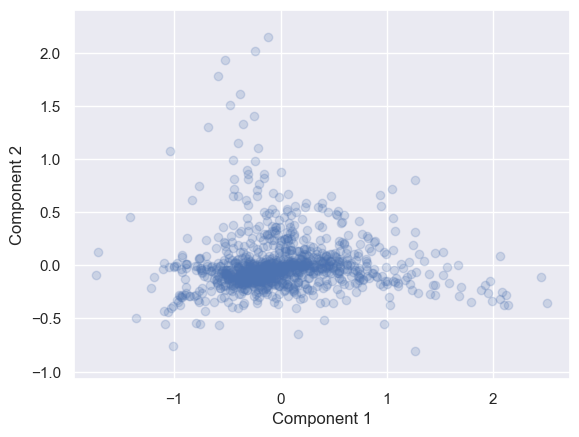

In [240]:
plt.scatter(df_pca[:, 1], df_pca[:, 2], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2');
plt.axis('equal');

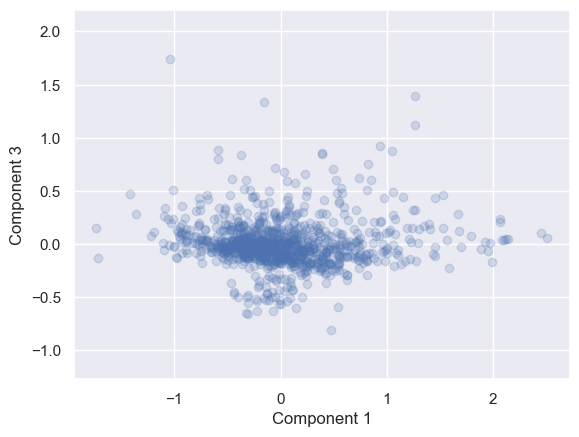

In [241]:
plt.scatter(df_pca[:, 1], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 3');
plt.axis('equal');

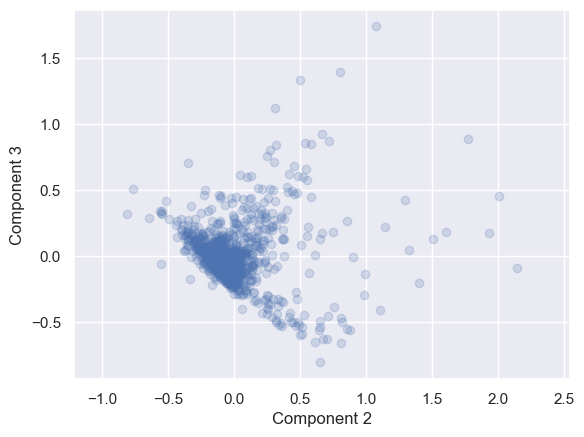

In [242]:
plt.scatter(df_pca[:, 2], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 2')
plt.ylabel('Component 3');
plt.axis('equal');

# Teste2 PCA